# Import libraries

In [4]:
from __future__ import print_function
from netCDF4 import Dataset
from wrf import getvar, interplevel, latlon_coords, get_cartopy
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xray
from glob import glob

# Read Dataset and Variables

In [7]:
aggr_total=[]

for fname in sorted(glob('/run/user/1000/gvfs/sftp:host=10.102.6.77,user=kaushik/media/kaushik/Seagate_4TB/WRF_output/wrfout/wrfout_d01_2015-04-*')):
#ncfile = Dataset('/run/user/1000/gvfs/sftp:host=10.102.6.77,user=kaushik/media/kaushik/Seagate_4TB/WRF_output/wrfout/wrfout_d01_2015-04-01_00:00:00')
    ncfile = Dataset(fname)
    p = getvar(ncfile,'p')
    temp = getvar(ncfile, 'tk')
    so4ai = getvar(ncfile,"so4ai")
    so4aj = getvar(ncfile, "so4aj")
    total = (so4ai+so4aj) * ((p * 28.97)/(8.314*temp*1000))
    aggr_total.append(total)


In [ ]:
x = xray.concat(aggr_total,'Time')


# Selection of domain (conversion to DataArray) & averaging 

In [10]:

lon_box = [60,100]
lat_box = [0,40]

dset = xray.DataArray(aggr_total.data, coords=[aggr_total.XTIME.data,aggr_total.bottom_top.data,aggr_total.XLAT.data[:,0],total.XLONG.data[0,:]],dims=['time','levels','latitude','longitude'])
data_select = dset.sel(latitude=slice(lat_box[0],lat_box[1]),longitude=slice(lon_box[0],lon_box[1]))


data = np.mean(data_select,axis=(1,2))
pressure = np.mean(p, axis = (1,2))


AttributeError: 'list' object has no attribute 'data'

# Spatial 2D plot 

/home/arushi/Documents/Tools/miniconda3/envs/py35/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


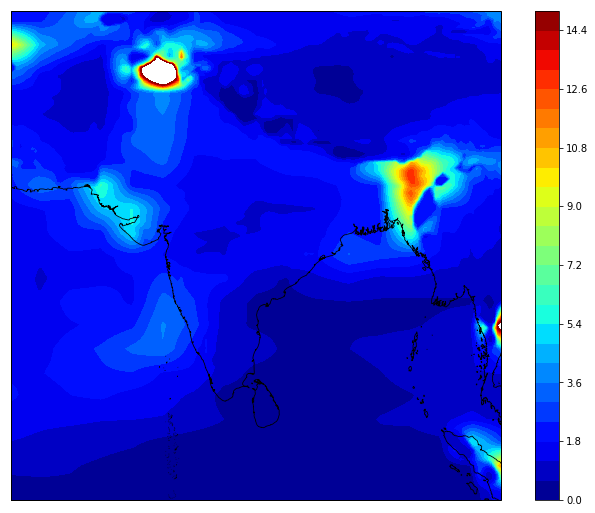

In [7]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('10m', linewidth=0.8)
plt.contourf(data_select.longitude.data,data_select.latitude.data,data_select.data[0],np.linspace(0,15,26),cmap='jet')
plt.colorbar()

# Vertical plot

In [ ]:
plt.plot(data,pressure/100,'o')
plt.errorbar(data, pressure, yerr=, fmt='.k');
ax = plt.gca()
ax.invert_yaxis()
